### DTree Project

Rounak Paul, M.Sc IT in AI
roll. 30017121007

In [2]:
#Importing Libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Load the dataset
df = pd.read_csv("drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

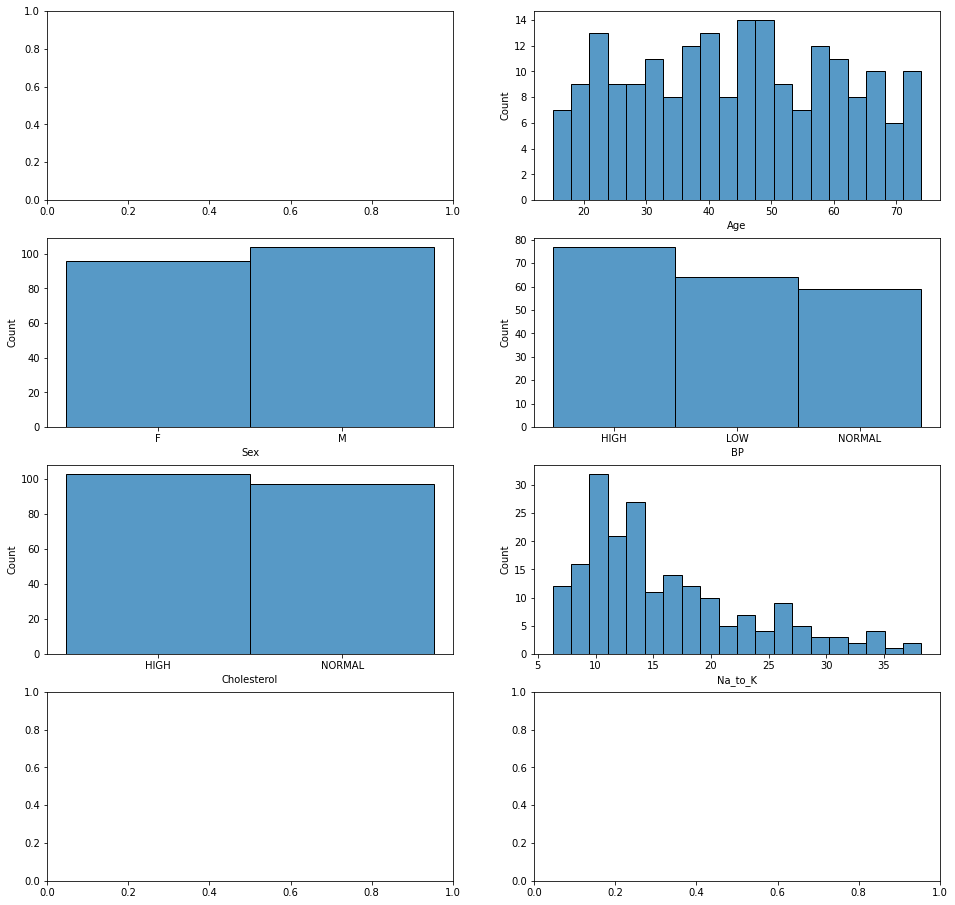

In [5]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Age, bins = 20, ax=ax[0,1])
sns.histplot(df.Sex, bins = 20, ax=ax[1,0])
sns.histplot(df.BP, bins = 20, ax=ax[1,1])
sns.histplot(df.Cholesterol, bins = 20, ax=ax[2,0])
sns.histplot(df.Na_to_K, bins = 20, ax=ax[2,1])


In [6]:
d = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
d[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
d[:,1] = le_sex.transform(d[ :,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
d[:,2] = le_BP.transform(d[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
d[:,3] = le_Chol.transform(d[:,3]) 

d[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [8]:
tv = df["Drug"]
tv[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
d_train, d_test, y_train, y_test = train_test_split(d,tv,test_size = 0.4, random_state = 3) #change test_size for different splits i.e. 80:20, 90:10. 70:30 
print(d_train.shape)
print(y_train.shape)
print(d_test.shape)
print(y_test.shape)

(120, 5)
(120,)
(80, 5)
(80,)


In [11]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth= 4)


In [12]:
drugTree.fit(d_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### DTree

In [13]:

y_pred = drugTree.predict(d_test)

In [14]:
print (y_pred [0:5])
print (y_test [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9875


In [16]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [17]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

InvocationException: GraphViz's executables not found